GROUP 11 TEAM MEMBERS

Ann Gloria Nyambura

Jerry Mandela

Abigail Nzambi

Benson Ntokote

Joseph Kimotho Kimana


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
df1.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [4]:
df1.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [5]:
df2 = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
df2.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [6]:
df2.isnull().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


RUNNING HYPOTHESIS TESTS

1.a) Finding out if the yield of Maize different from the yield of Sorghum in Karamojong districts. (APPLICATION OF NULL AND ALTERNATIVE HYPOTHESIS)

In [7]:
#Calculating the mean yield for the crops
mean_yield_maize = df1['M_Yield_Ha'].mean()
mean_yield_sorghum = df1['S_Yield_Ha'].mean()
print(f'The mean yield of Maize is {mean_yield_maize}')
print(f'The mean yield of Sorghum is {mean_yield_sorghum}')

The mean yield of Maize is 986.1428571428571
The mean yield of Sorghum is 269.2857142857143


In [8]:
#Running a T-test
t_stat, p_value = stats.ttest_ind(df1['M_Yield_Ha'], df1['S_Yield_Ha'])
print(f'The t-statistic is {t_stat}')
print(f'The p-value is {p_value}')

The t-statistic is 5.530107541933369
The p-value is 0.00012983852794171838


In [9]:
#Combining the results into a usable form
results1 = pd.DataFrame({'Metric':['Mean Yield','T-Statistic', 'P-Value'], 'Maize':[mean_yield_maize, t_stat, np.nan], 'Sorghum':[mean_yield_sorghum, np.nan, np.nan], 'Significance':[np.nan, np.nan, p_value]})
results1['Maize'] = results1['Maize'].apply(lambda x: f'{x:,.2f}' if isinstance(x, float) else x)
results1['Sorghum'] = results1['Sorghum'].apply(lambda x: f'{x:,.2f}' if isinstance(x, float) else x)
results1['Significance'] = results1['Significance'].apply(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

print("HYPOTHESIS TEST RESULTS: MAIZE vs. SORGHUM YIELD")
print("="*50)
print(results1.to_string(index=False))
print("\n" + "="*50)

HYPOTHESIS TEST RESULTS: MAIZE vs. SORGHUM YIELD
     Metric  Maize Sorghum Significance
 Mean Yield 986.14  269.29          nan
T-Statistic   5.53     nan          nan
    P-Value    nan     nan       0.0001



In [10]:
#Application of condition('if p>0.05 ACCEPT else if p<0.05 REJECT)
if p_value < 0.05:
    print(f"REJECT the null hypothesis (p < 0.05).")
    print("There is a significant difference in yields.")

    higher_yield_crop = ['Maize', 'Sorghum'][np.argmax([mean_yield_maize, mean_yield_sorghum])]
    print(f"{higher_yield_crop} has a significantly higher average yield.")
else:
    print(f" DO NOT REJECT the null hypothesis (p >= 0.05).")
    print("There is no significant difference in yields.")

REJECT the null hypothesis (p < 0.05).
There is a significant difference in yields.
Maize has a significantly higher average yield.


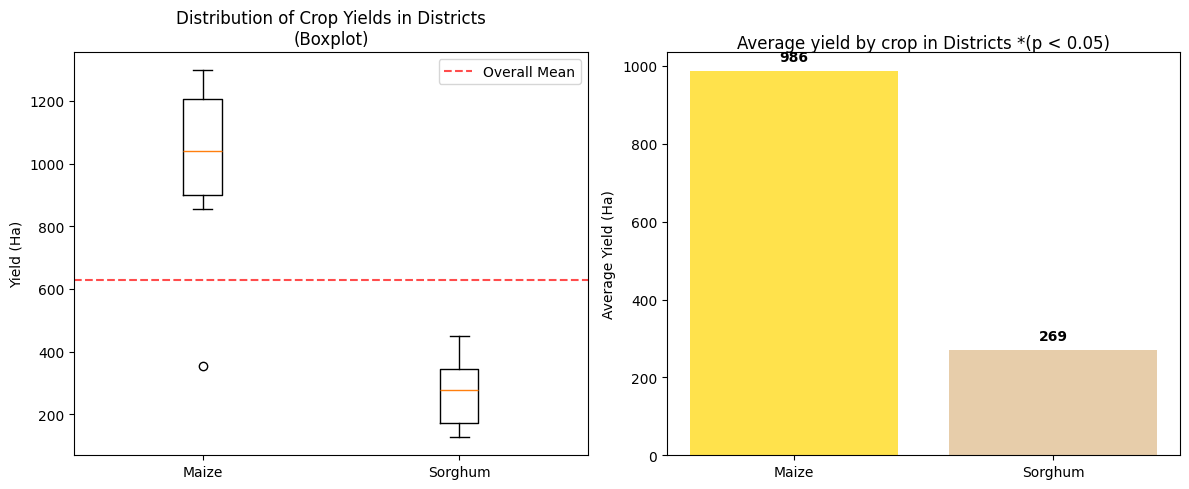


- Maize Average Yield: 986 kg/Ha
- Sorghum Average Yield: 269 kg/Ha
The difference is statistically significant.
Prioritize support and inputs for Maize in the Districts to maximize output.


In [11]:
#CREATING A VISUAL REPRESENTATION USING THE PREVIOUS RESULTS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
yield_data = [df1['M_Yield_Ha'], df1['S_Yield_Ha']]
ax1.boxplot(yield_data, tick_labels=['Maize', 'Sorghum'])
ax1.set_ylabel('Yield (Ha)')
ax1.set_title('Distribution of Crop Yields in Districts\n(Boxplot)')
ax1.axhline(y=df1[['M_Yield_Ha', 'S_Yield_Ha']].values.mean(), color='r', linestyle='--', alpha=0.7, label='Overall Mean')
ax1.legend()

crops = ['Maize', 'Sorghum']
means = [mean_yield_maize, mean_yield_sorghum]
bars = ax2.bar(crops, means, color=['gold', 'burlywood'], alpha=0.7)
ax2.set_ylabel('Average Yield (Ha)')

for bar, mean in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{mean:,.0f}',
             ha='center', va='bottom', fontweight='bold')

if p_value < 0.05:
    ax2.text(0.5, max(means) * 1.05, f'Average yield by crop in Districts *(p < 0.05)', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print(f"- Maize Average Yield: {mean_yield_maize:,.0f} kg/Ha")
print(f"- Sorghum Average Yield: {mean_yield_sorghum:,.0f} kg/Ha")

if p_value < 0.05:
    print("The difference is statistically significant.")
    print(f"Prioritize support and inputs for {higher_yield_crop} in the Districts to maximize output.")
else:
    print("No significant yield difference found.")
    print("Base crop support decisions on other factors")

1.b) Finding out if the yield of Maize different from the yield of Sorghum in Karamojong sub-counties. (APPLICATION OF NULL AND ALTERNATIVE HYPOTHESIS)

In [12]:
df2.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [13]:
# Applying the same process as above but for the sub-counties
mean_yield_maize2 = df2['M_Yield_Ha'].mean()
mean_yield_sorghum2 = df2['S_Yield_Ha'].mean()

t_stat, p_value = stats.ttest_ind(df1['M_Yield_Ha'], df1['S_Yield_Ha'])

results1 = pd.DataFrame({'Metric':['Mean Yield','T-Statistic', 'P-Value'], 'Maize':[mean_yield_maize2, t_stat, np.nan], 'Sorghum':[mean_yield_sorghum2, np.nan, np.nan], 'Significance':[np.nan, np.nan, p_value]})
results1['Maize'] = results1['Maize'].apply(lambda x: f'{x:,.2f}' if isinstance(x, float) else x)
results1['Sorghum'] = results1['Sorghum'].apply(lambda x: f'{x:,.2f}' if isinstance(x, float) else x)
results1['Significance'] = results1['Significance'].apply(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

print("HYPOTHESIS TEST RESULTS: MAIZE vs. SORGHUM YIELD")
print("="*50)
print(results1.to_string(index=False))
print("\n" + "="*50)

if p_value < 0.05:
    print(f"REJECT the null hypothesis (p < 0.05).")
    print("There is a significant difference in yields.")

    higher_yield_crop = ['Maize', 'Sorghum'][np.argmax([mean_yield_maize2, mean_yield_sorghum2])]
    print(f"{higher_yield_crop} has a significantly higher average yield.")
else:
    print(f" DO NOT REJECT the null hypothesis (p >= 0.05).")
    print("There is no significant difference in yields.")

HYPOTHESIS TEST RESULTS: MAIZE vs. SORGHUM YIELD
     Metric  Maize Sorghum Significance
 Mean Yield 940.26  274.17          nan
T-Statistic   5.53     nan          nan
    P-Value    nan     nan       0.0001

REJECT the null hypothesis (p < 0.05).
There is a significant difference in yields.
Maize has a significantly higher average yield.


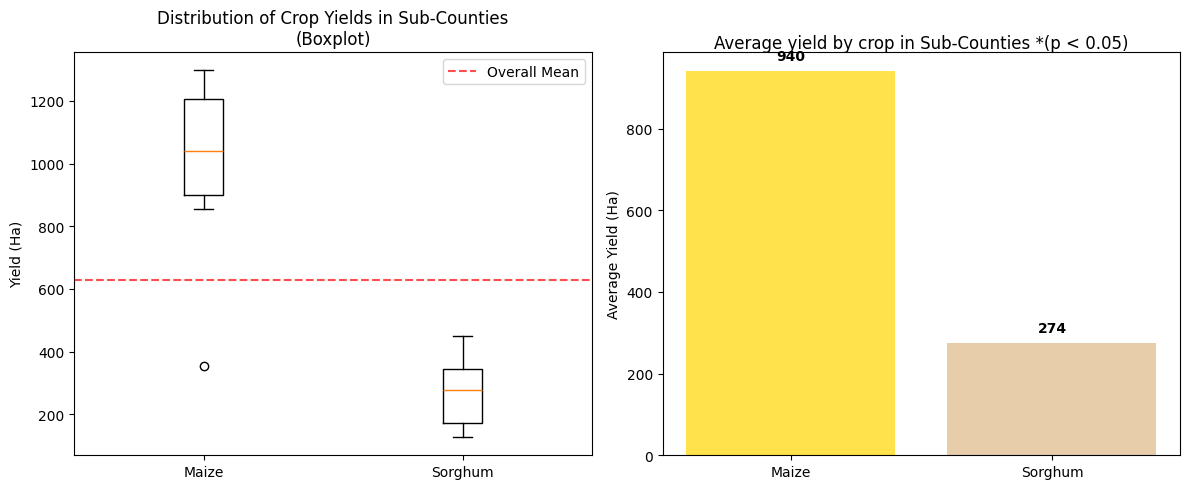


- Maize Average Yield: 940 kg/Ha
- Sorghum Average Yield: 274 kg/Ha
The difference is statistically significant.
Prioritize support and inputs for Maize in the Sub-Counties to maximize output.


In [14]:
#VISUALIZING THE ABOVE RESULTS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
yield_data = [df1['M_Yield_Ha'], df1['S_Yield_Ha']]
ax1.boxplot(yield_data, tick_labels=['Maize', 'Sorghum'])
ax1.set_ylabel('Yield (Ha)')
ax1.set_title('Distribution of Crop Yields in Sub-Counties\n(Boxplot)')
ax1.axhline(y=df1[['M_Yield_Ha', 'S_Yield_Ha']].values.mean(), color='r', linestyle='--', alpha=0.7, label='Overall Mean')
ax1.legend()

crops = ['Maize', 'Sorghum']
means = [mean_yield_maize2, mean_yield_sorghum2]
bars = ax2.bar(crops, means, color=['gold', 'burlywood'], alpha=0.7)
ax2.set_ylabel('Average Yield (Ha)')

for bar, mean in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{mean:,.0f}',
             ha='center', va='bottom', fontweight='bold')

if p_value < 0.05:
    ax2.text(0.5, max(means) * 1.05, f'Average yield by crop in Sub-Counties *(p < 0.05)', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print(f"- Maize Average Yield: {mean_yield_maize2:,.0f} kg/Ha")
print(f"- Sorghum Average Yield: {mean_yield_sorghum2:,.0f} kg/Ha")

if p_value < 0.05:
    print("The difference is statistically significant.")
    print(f"Prioritize support and inputs for {higher_yield_crop} in the Sub-Counties to maximize output.")
else:
    print("No significant yield difference found.")
    print("Base crop support decisions on other factors")

2.a)USING PEARSONS CORRELATION CO-FFICIENT TEST (R=SUM(xy)/SQUAREROOT((x)^2(y)^2) TO MEASURE THE SIGNIFICANCE OF TOTAL AREA PLANTED AND TOTAL PRODUCTION IN THE DISTRICTS. In our case test1: x=(M_Area_Ha), y=(M_Prod_Tot) and test2: x=(S_Area_Ha), y=(S_Prod_Tot). To recommend this value of r must show a moderate linear relationship and above(atleast 0.5) and the value of p < 0.05.

In [15]:
#Test1
maize_corr, maize_p_value = stats.pearsonr(df1['M_Area_Ha'], df1['M_Prod_Tot'])
print(f"Correlation Coefficient (r): {maize_corr:.4f}")
print(f"P-value: {maize_p_value:.6f}\n")

if maize_corr >= 1:
  print('Perfect linear relationship')
elif maize_corr >= 0.75:
  print('Strong linear relationship')
elif maize_corr >= 0.5:
  print('Moderate linear relationship')
elif maize_corr >= 0.25:
  print('Weak linear relationship')
else:
  print('No linear relationship')

if maize_p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Correlation Coefficient (r): 0.9463
P-value: 0.001248

Strong linear relationship
Reject the null hypothesis


In [16]:
if maize_corr >= 0.5 and maize_p_value < 0.05:
  print("We found a strong, significant correlation between area planted and total production.")
elif maize_corr <= 0.5 and maize_p_value >= 0.05:
  print("We found a weak, significant correlation between are planted and total production.")
else:
  ("Print the test does no fit the thesis requirements")

We found a strong, significant correlation between area planted and total production.


In [17]:
#Test2
sorghum_corr, sorghum_p_value = stats.pearsonr(df1['S_Area_Ha'], df1['S_Prod_Tot'])
print(f"Correlation Coefficient (r): {sorghum_corr:.4f}")
print(f"P-value: {sorghum_p_value:.6f}\n")

if sorghum_corr >= 1:
  print('Perfect linear relationship')
elif sorghum_corr >= 0.75:
  print('Strong linear relationship')
elif sorghum_corr >= 0.5:
  print('Moderate linear relationship')
elif sorghum_corr >= 0.25:
  print('Weak linear relationship')
else:
  print('No linear relationship')

if sorghum_p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Correlation Coefficient (r): 0.9764
P-value: 0.000161

Strong linear relationship
Reject the null hypothesis


In [18]:
if sorghum_corr >= 0.5 and sorghum_p_value < 0.05:
  print("We found a strong, significant correlation between area planted and total production.")
elif sorghum_corr <= 0.5 and sorghum_p_value >= 0.05:
  print("We found a weak, significant correlation between are planted and total production.")
else:
  ("Print the test does no fit the thesis requirements")

We found a strong, significant correlation between area planted and total production.


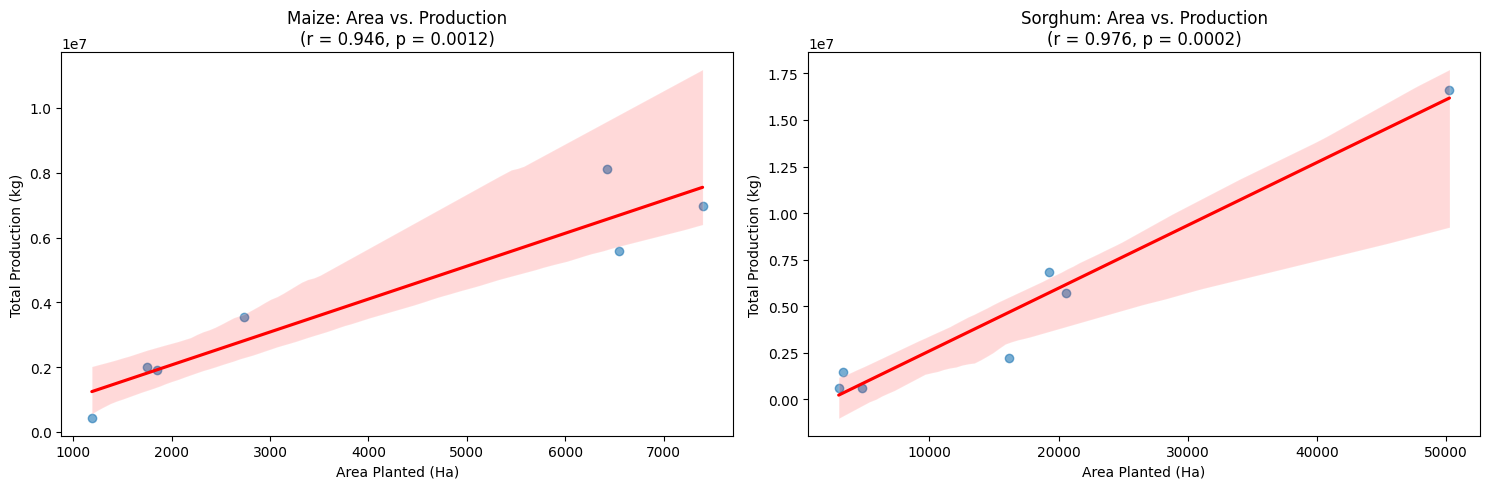

In [19]:
# Visualizing the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

sns.regplot(x=df1['M_Area_Ha'], y=df1['M_Prod_Tot'], ax=ax1, line_kws={"color": "red"}, scatter_kws={"alpha":0.6})
ax1.set_title(f'Maize: Area vs. Production\n(r = {maize_corr:.3f}, p = {maize_p_value:.4f})')
ax1.set_xlabel('Area Planted (Ha)')
ax1.set_ylabel('Total Production (kg)')

sns.regplot(x=df1['S_Area_Ha'], y=df1['S_Prod_Tot'], ax=ax2, line_kws={"color": "red"}, scatter_kws={"alpha":0.6})
ax2.set_title(f'Sorghum: Area vs. Production\n(r = {sorghum_corr:.3f}, p = {sorghum_p_value:.4f})')
ax2.set_xlabel('Area Planted (Ha)')
ax2.set_ylabel('Total Production (kg)')

plt.tight_layout()
plt.show()

In [20]:
df2.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [21]:
# DOING THE ABOVE TESTS FOR THE DISTRICTS
maize_corr, maize_p_value = stats.pearsonr(df2['M_Area_Ha'], df2['M_Prod_Tot'])
print(f"Correlation Coefficient (r): {maize_corr:.4f}")
print(f"P-value: {maize_p_value:.6f}\n")

if maize_corr >= 1:
  print('Perfect linear relationship')
elif maize_corr >= 0.75:
  print('Strong linear relationship')
elif maize_corr >= 0.5:
  print('Moderate linear relationship')
elif maize_corr >= 0.25:
  print('Weak linear relationship')
else:
  print('No linear relationship')

if maize_p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Correlation Coefficient (r): 0.9624
P-value: 0.000000

Strong linear relationship
Reject the null hypothesis


In [22]:
if maize_corr >= 0.5 and maize_p_value < 0.05:
  print("We found a strong, significant correlation between area planted and total production.")
elif maize_corr <= 0.5 and maize_p_value >= 0.05:
  print("We found a weak, significant correlation between are planted and total production.")
else:
  ("Print the test does no fit the thesis requirements")

We found a strong, significant correlation between area planted and total production.


In [23]:
sorghum_corr, sorghum_p_value = stats.pearsonr(df2['S_Area_Ha'], df2['S_Prod_Tot'])
print(f"Correlation Coefficient (r): {sorghum_corr:.4f}")
print(f"P-value: {sorghum_p_value:.6f}\n")

if sorghum_corr >= 1:
  print('Perfect linear relationship')
elif sorghum_corr >= 0.75:
  print('Strong linear relationship')
elif sorghum_corr >= 0.5:
  print('Moderate linear relationship')
elif sorghum_corr >= 0.25:
  print('Weak linear relationship')
else:
  print('No linear relationship')

if sorghum_p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Correlation Coefficient (r): 0.9587
P-value: 0.000000

Strong linear relationship
Reject the null hypothesis


In [24]:
if sorghum_corr >= 0.5 and sorghum_p_value < 0.05:
  print("We found a strong, significant correlation between area planted and total production.")
elif sorghum_corr <= 0.5 and sorghum_p_value >= 0.05:
  print("We found a weak, significant correlation between are planted and total production.")
else:
  ("Print the test does no fit the thesis requirements")

We found a strong, significant correlation between area planted and total production.


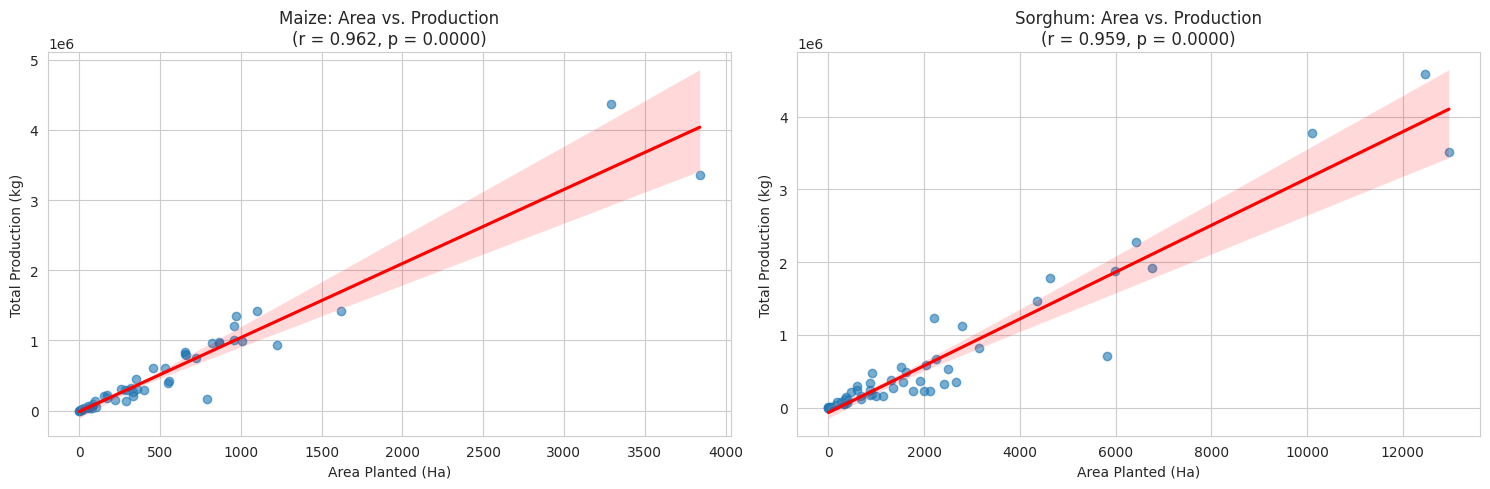

In [25]:
# Visualizing the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

sns.regplot(x=df2['M_Area_Ha'], y=df2['M_Prod_Tot'], ax=ax1, line_kws={"color": "red"}, scatter_kws={"alpha":0.6})
ax1.set_title(f'Maize: Area vs. Production\n(r = {maize_corr:.3f}, p = {maize_p_value:.4f})')
ax1.set_xlabel('Area Planted (Ha)')
ax1.set_ylabel('Total Production (kg)')

sns.regplot(x=df2['S_Area_Ha'], y=df2['S_Prod_Tot'], ax=ax2, line_kws={"color": "red"}, scatter_kws={"alpha":0.6})
ax2.set_title(f'Sorghum: Area vs. Production\n(r = {sorghum_corr:.3f}, p = {sorghum_p_value:.4f})')
ax2.set_xlabel('Area Planted (Ha)')
ax2.set_ylabel('Total Production (kg)')

plt.tight_layout()
plt.show()

From the above tests on the districts and sun-counties, We found a strong, significant correlation between area planted and total production. This means that an increase in Area planted will result in in an increase in total production.

In [26]:
trial1 = df1.copy()
trial1.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [27]:
trial1['Total_Yield'] = trial1['M_Yield_Ha'].add(trial1['S_Yield_Ha'])
trial1.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,1489
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,1502
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,1224
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,1479
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,483


In [28]:
trial1.drop(['M_Yield_Ha', 'S_Yield_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'], axis=1, inplace=True)
trial1.head()

,OBJECTID,NAME,POP,Area,Crop_Area_Ha,Total_Yield
0,92,ABIM,90385,2771977106,5470.068394,1489
1,96,AMUDAT,101790,1643582836,5765.443719,1502
2,20,KAABONG,627057,7373606003,28121.672530,1224
3,85,KOTIDO,243157,3641539808,53032.649450,1479
4,5,MOROTO,127811,3570160948,5954.814048,483


In [29]:
trial1.head()

,OBJECTID,NAME,POP,Area,Crop_Area_Ha,Total_Yield
0,92,ABIM,90385,2771977106,5470.068394,1489
1,96,AMUDAT,101790,1643582836,5765.443719,1502
2,20,KAABONG,627057,7373606003,28121.672530,1224
3,85,KOTIDO,243157,3641539808,53032.649450,1479
4,5,MOROTO,127811,3570160948,5954.814048,483


We want to see whether a relationship can be established from doing a hypothesis test on "Crop_Area_Ha" and "Total_Yield" meaning if we increase or decrease the "Crop_Area_Ha" will it have an effect on "Total_Yield".

In [30]:
from scipy import stats
import seaborn as sns

Hypothesis Test Results:
Correlation coefficient: 0.3019
P-value: 0.5105
Result: Fail to reject the null hypothesis - No significant relationship found.


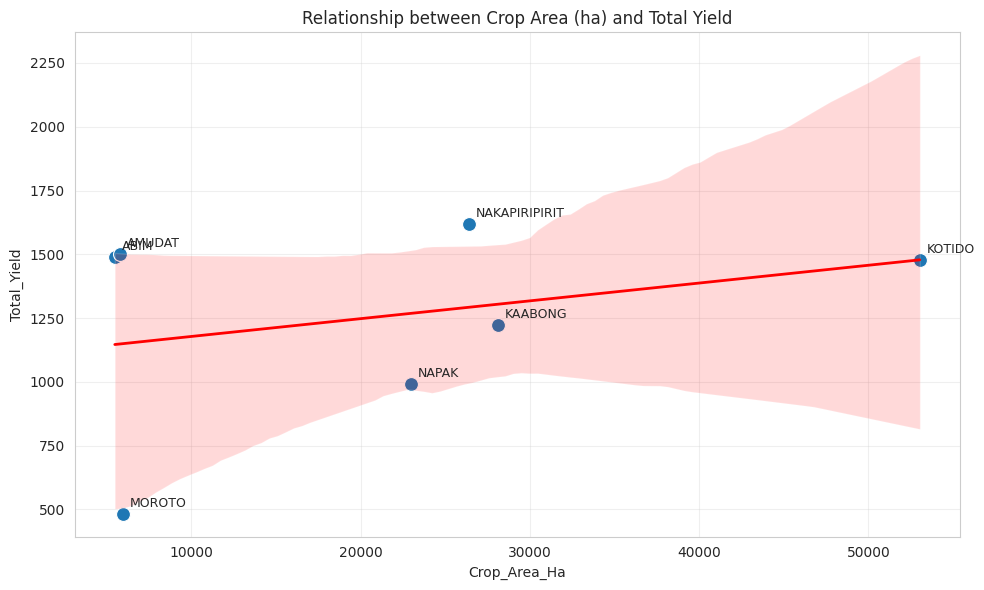


Additional Statistics:
Sample size: 7
Mean Crop Area: 21094.52 ha
Mean Total Yield: 1255.43


In [31]:
correlation, p_value = stats.pearsonr(trial1['Crop_Area_Ha'], trial1['Total_Yield'])

print("Hypothesis Test Results:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis - There is a statistically significant relationship.")
else:
    print("Result: Fail to reject the null hypothesis - No significant relationship found.")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trial1, x='Crop_Area_Ha', y='Total_Yield', s=100)
plt.title('Relationship between Crop Area (ha) and Total Yield')
plt.xlabel('Crop Area (ha)')
plt.ylabel('Total Yield')

sns.regplot(data=trial1, x='Crop_Area_Ha', y='Total_Yield',
            scatter=False, color='red', line_kws={"linewidth": 2})

for i, row in trial1.iterrows():
    plt.annotate(row['NAME'], (row['Crop_Area_Ha'], row['Total_Yield']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAdditional Statistics:")
print(f"Sample size: {len(trial1)}")
print(f"Mean Crop Area: {trial1['Crop_Area_Ha'].mean():.2f} ha")
print(f"Mean Total Yield: {trial1['Total_Yield'].mean():.2f}")

From the resluts we have above, a weak  positive correlation between Crop area and Total yiled which means an increase in crop area does not necesarily mean an increase in crop yields.